In [1]:
import os
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import netCDF4 as nc4
import cmocean.cm as cm
from eccoseas.ecco import exf
from eccoseas.downscale import hFac

In [2]:
input_dir = '/Users/account/Desktop/CS 185C/cs185c_fall2024/PROJECT/input'

In [3]:
data_folder = '/Volumes/SanDisk/PROJECT DATA'

**I will be using global data files with data.exf_global so I will let MITgcm automatically interpolate these data points onto my model grid for me**


In [7]:
# make a file dictionary to loop over
file_prefix_dict = {'ATEMP':'EIG_tmp2m_degC_plus_ECCO_v4r1_ctrl',
             'AQH':'EIG_spfh2m_plus_ECCO_v4r1_ctrl',
             'SWDOWN':'EIG_dsw_plus_ECCO_v4r1_ctrl',
             'LWDOWN':'EIG_dlw_plus_ECCO_v4r1_ctrl',
             'UWIND':'EIG_u10m',
             'VWIND':'EIG_v10m',
             'PRECIP':'EIG_rain_plus_ECCO_v4r1_ctrl'}



# full list - uncomment after testing
variable_names = list(file_prefix_dict.keys())

In [10]:
meta_dict = {'ATEMP':[273, 290, cm.thermal, 'K'],
             'AQH':[0, 0.025, cm.tempo, 'kg/kg'],
             'PRECIP':[0, 1e-6, cm.tempo, 'm/s'],
             'SWDOWN':[-10,20,cm.solar,'W/m$^2$'],
             'LWDOWN':[-100, 500,cm.solar,'W/m$^2$'],
             'UWIND':[-20, 20, cm.balance, 'm/s'],
             'VWIND':[-20, 20, cm.balance, 'm/s'],
             'RUNOFF':[0, 2e-8, cm.tempo, 'm/s']}

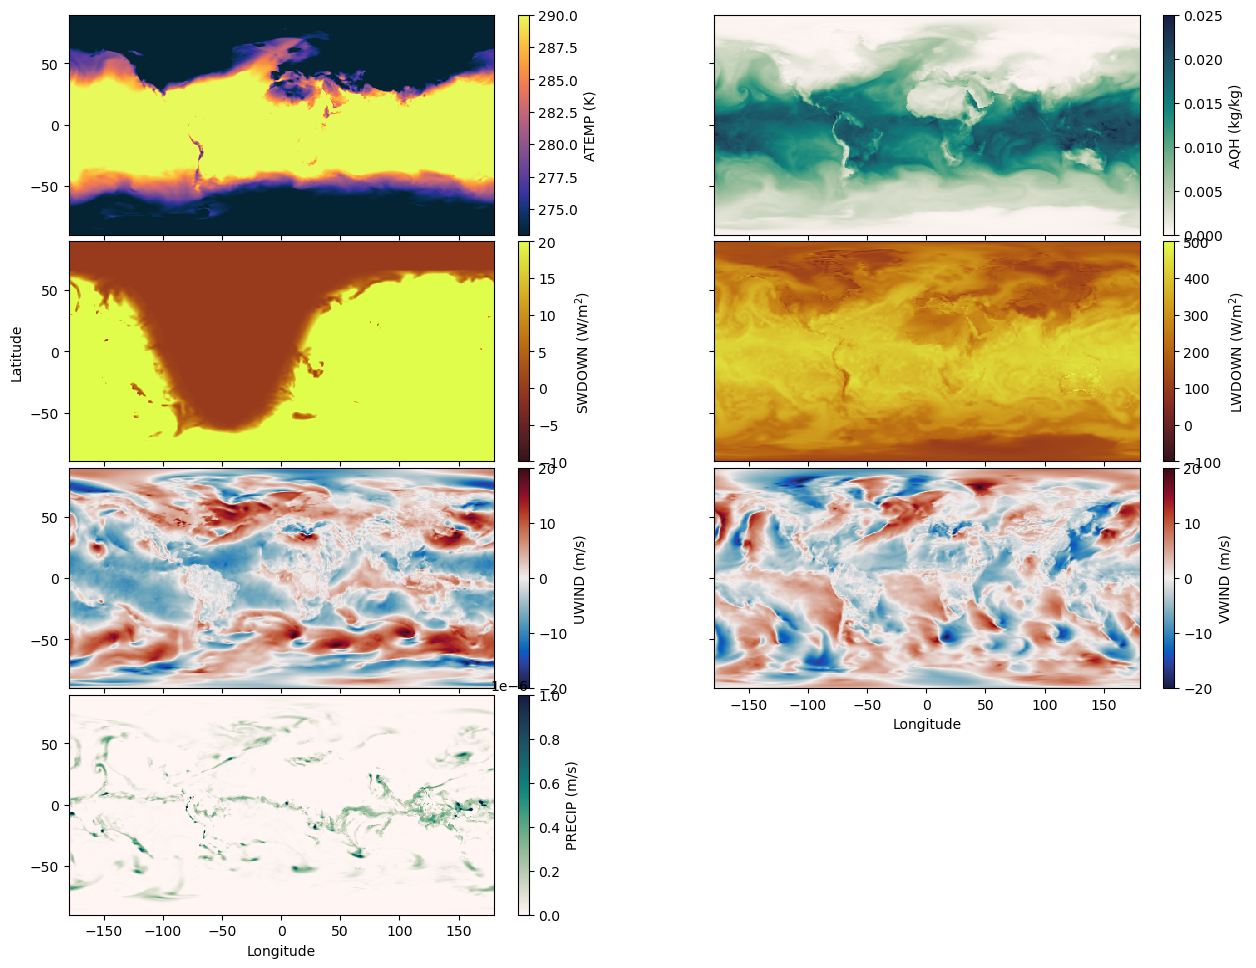

In [11]:
fig = plt.figure(figsize=(14,10))
gs = GridSpec(4, 2, wspace=0.4, hspace=0.03, 
              left=0.11, right=0.9, top=0.95, bottom=0.05)



year=2015

# loop through each variable to read in the grid
i = 0
for field in variable_names:
    
    exf_lon, exf_lat, exf_grid = exf.read_ecco_exf_file(data_folder, file_prefix_dict[field], year)
  
    exf_grid = exf_grid[0, :, :]

    if field == 'ATEMP':
        exf_grid += 273.15
    if field in ['SWDOWN', 'LWDOWN']:
        exf_grid *= -1
        
    Exf_Lon, Exf_Lat = np.meshgrid(exf_lon, exf_lat)
    
    ax1 = fig.add_subplot(gs[i])
    C = plt.pcolormesh(Exf_Lon, Exf_Lat, exf_grid,
                       vmin = meta_dict[field][0], vmax = meta_dict[field][1],
                       cmap=meta_dict[field][2])
    plt.colorbar(C, label=field +' ('+meta_dict[field][3]+')',fraction=0.026)

    if i<5:
        plt.gca().set_xticklabels([])
    else:
        plt.gca().set_xlabel('Longitude')
    if i%2==1:
        plt.gca().set_yticklabels([])
    if i==7:
        plt.gca().axis('off')
    if i==2:
        plt.gca().set_ylabel('Latitude')
    i += 1

plt.show()

I will implement the external forcing conditions using the global data files and let MITgcm automatically interpolate those for me. 